# Analyse results - DistilBART training

In [46]:
import os
from util_scripts import analysis_utils as au

In [47]:
CWD = os.getcwd()
BART_RESULTS_DIR = os.path.join(CWD, 'results', 'bart', 'bart_2409_2045_results')
T5_RESULTS_DIR = os.path.join(CWD, 'results', 't5', 't5-abs-2309-1054-v0')

## Show DistilBART results

In [48]:
exp_epochs, test_metrics = au.get_file_to_df(BART_RESULTS_DIR)

In [49]:
metrics_rouge = ['test_rouge/rouge1', 'test_rouge/rouge2', 'test_rouge/rougeL', 'test_meteor']
metrics_bert_meteor = ['test_bertscore/bertscore-precision', 'test_bertscore/bertscore-recall', 'test_bertscore/bertscore-f1']

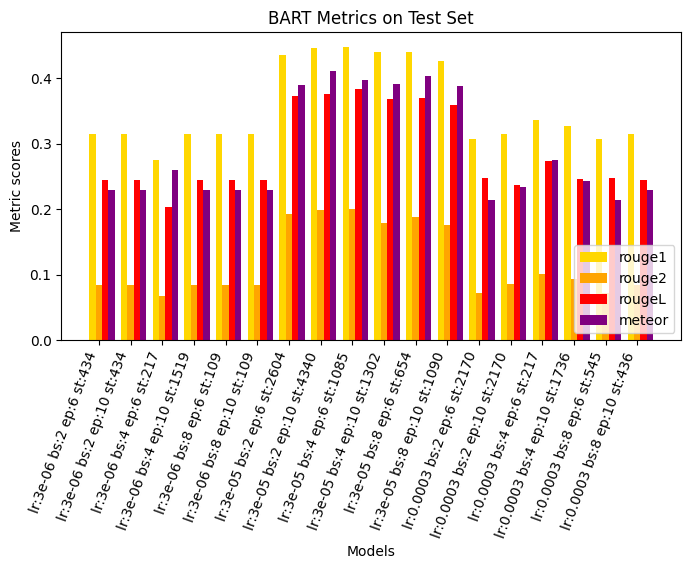

In [50]:
au.metrics_columns_to_names(test_metrics,'BART', metrics_rouge)

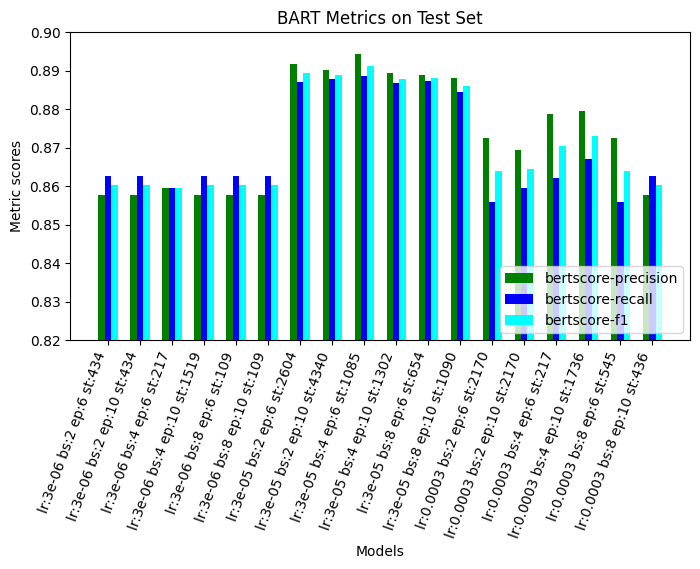

In [51]:
au.metrics_columns_to_names(test_metrics,'BART', metrics_bert_meteor, blue=True)

In [52]:
au.model_table('BART', test_metrics, {'test_gen_len': "Generation Length"})

BART model params 		 Generation Length
lr:3e-06 bs:2 ep:6 st:434 	 36.00
lr:3e-06 bs:2 ep:10 st:434 	 36.00
lr:3e-06 bs:4 ep:6 st:217 	 44.00
lr:3e-06 bs:4 ep:10 st:1519 	 36.00
lr:3e-06 bs:8 ep:6 st:109 	 36.00
lr:3e-06 bs:8 ep:10 st:109 	 36.00
lr:3e-05 bs:2 ep:6 st:2604 	 36.62
lr:3e-05 bs:2 ep:10 st:4340 	 38.83
lr:3e-05 bs:4 ep:6 st:1085 	 36.42
lr:3e-05 bs:4 ep:10 st:1302 	 37.61
lr:3e-05 bs:8 ep:6 st:654 	 39.00
lr:3e-05 bs:8 ep:10 st:1090 	 37.40
lr:0.0003 bs:2 ep:6 st:2170 	 29.00
lr:0.0003 bs:2 ep:10 st:2170 	 32.00
lr:0.0003 bs:4 ep:6 st:217 	 33.00
lr:0.0003 bs:4 ep:10 st:1736 	 34.00
lr:0.0003 bs:8 ep:6 st:545 	 29.00
lr:0.0003 bs:8 ep:10 st:436 	 36.00


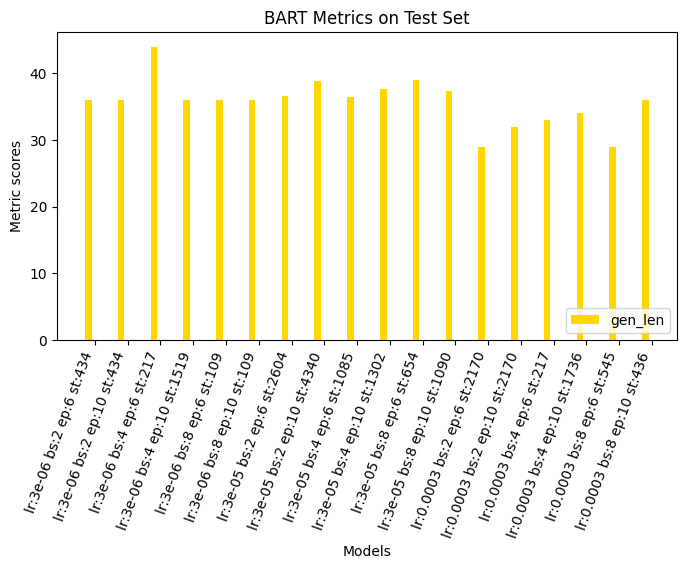

In [53]:
# show generation lengths
au.metrics_columns_to_names(test_metrics, 'BART', ['test_gen_len'])

## Show T5 results

In [54]:
exp_epochs, test_metrics = au.get_file_to_df(T5_RESULTS_DIR)

In [55]:
metrics_rouge = ['test_rouge/rouge1', 'test_rouge/rouge2', 'test_rouge/rougeL', 'test_meteor']
metrics_bert_meteor = ['test_bertscore/bertscore-precision', 'test_bertscore/bertscore-recall', 'test_bertscore/bertscore-f1']

In [98]:
del au
from util_scripts import analysis_utils as au

In [107]:
au.best_scores_table(test_metrics, metrics_rouge + metrics_bert_meteor)

Model 				 rouge1	rouge2	rougeL	meteor	bert-pr	bert-re	bert-f1
lr:1e-05 bs:2 ep:20 st:217 	 0.4388	0.1930	0.3731	0.4086	0.8896	0.8918	0.8905
lr:1e-05 bs:5 ep:20 st:174 	 0.4369	0.1925	0.3709	0.4098	0.8885	0.8916	0.8899
lr:1e-05 bs:10 ep:20 st:43 	 0.4394	0.1943	0.3730	0.4133	0.8886	0.8919	0.8901
lr:1e-04 bs:2 ep:20 st:434 	 0.4345	0.1828	0.3666	0.3980	0.8899	0.8902	0.8899
lr:1e-04 bs:5 ep:20 st:870 	 0.4362	0.1903	0.3708	0.4071	0.8890	0.8916	0.8902
lr:1e-04 bs:10 ep:20 st:826 	 0.4458	0.2015	0.3751	0.4130	0.8892	0.8924	0.8907
lr:1e-03 bs:2 ep:20 st:868 	 0.4073	0.1635	0.3453	0.3546	0.8904	0.8837	0.8869
lr:1e-03 bs:5 ep:20 st:174 	 0.4376	0.1904	0.3668	0.4012	0.8900	0.8908	0.8902
lr:1e-03 bs:10 ep:20 st:435 	 0.4501	0.1968	0.3817	0.4121	0.8912	0.8923	0.8916


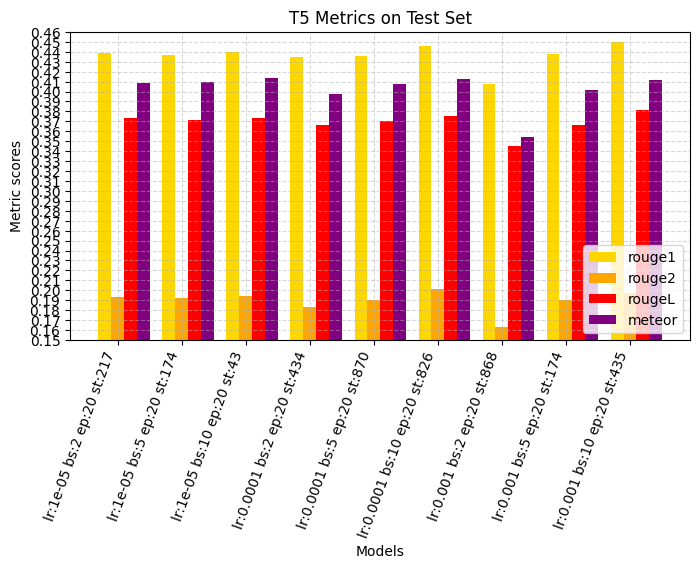

In [80]:
au.metrics_columns_to_names(test_metrics,'T5', metrics_rouge, detailed=True)

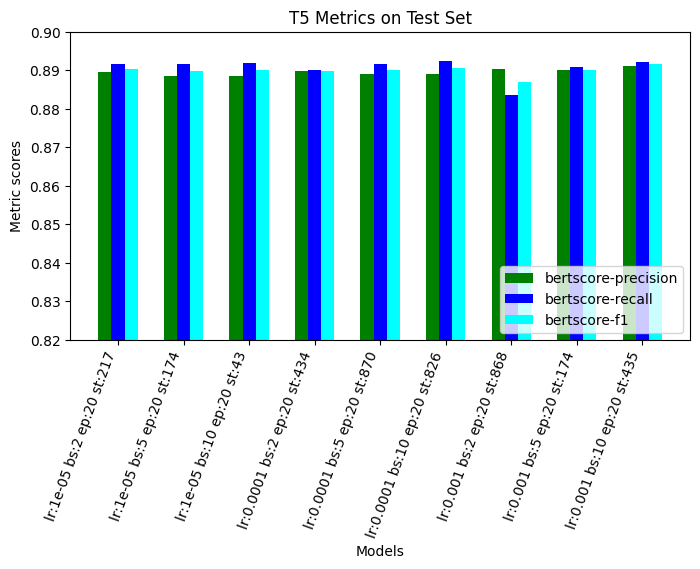

In [58]:
au.metrics_columns_to_names(test_metrics,'T5', metrics_bert_meteor, blue=True)

In [59]:
au.model_table('T5', test_metrics, {'test_gen_len': "Generation Length"})

T5 model params 		 Generation Length
lr:1e-05 bs:2 ep:20 st:217 	 41.62
lr:1e-05 bs:5 ep:20 st:174 	 42.58
lr:1e-05 bs:10 ep:20 st:43 	 42.50
lr:0.0001 bs:2 ep:20 st:434 	 40.51
lr:0.0001 bs:5 ep:20 st:870 	 41.95
lr:0.0001 bs:10 ep:20 st:826 	 43.01
lr:0.001 bs:2 ep:20 st:868 	 36.06
lr:0.001 bs:5 ep:20 st:174 	 41.48
lr:0.001 bs:10 ep:20 st:435 	 41.13


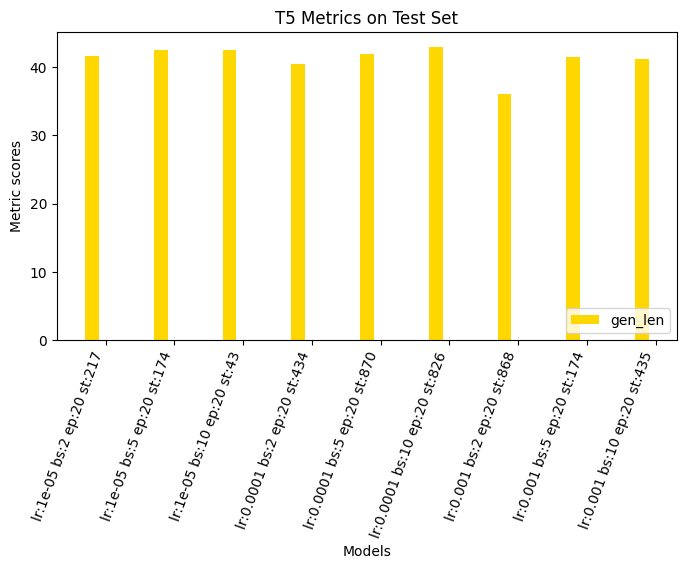

In [60]:
# show generation lengths
au.metrics_columns_to_names(test_metrics, 'T5', ['test_gen_len'])